In [44]:
import cmath
import networkx as nx
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import random

# Opgave 1 *

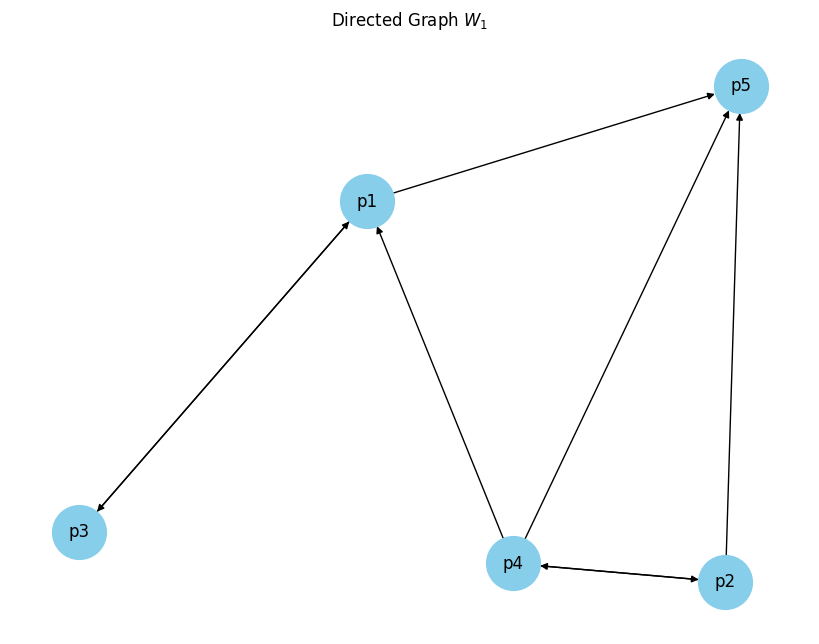

In [45]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5']
G.add_nodes_from(nodes)

edges = [('p1', 'p3'), ('p1', 'p5'),
         ('p2', 'p4'), ('p2', 'p5'),
         ('p3', 'p1'),
         ('p4', 'p1'), ('p4', 'p2'), ('p4', 'p5')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 2 *

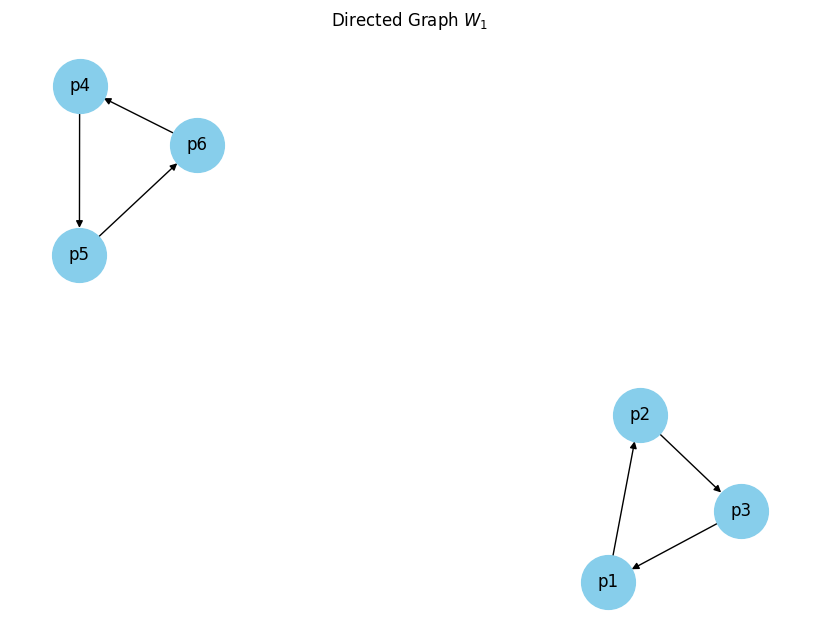

In [46]:
G = nx.DiGraph()

nodes = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6']
G.add_nodes_from(nodes)

edges = [('p1', 'p2'),
         ('p2', 'p3'),
         ('p3', 'p1'),
         ('p4', 'p5'),
         ('p5', 'p6'),
         ('p6', 'p4')]

G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, arrows=True, node_color='skyblue', node_size=1500, font_size=12)
plt.title("Directed Graph $W_1$")
plt.show()


# Opgave 3 & 4 *

In [47]:


# Definition af netværket
W1 = {
    'P1': {'P2', 'P3'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {}
}

W2 = {
    'P1': {'P2'},
    'P2': {'P3'},
    'P3': {'P1'},
    'P4': {'P5'},
    'P5': {'P6'},
    'P6': {'P4'}
}

def makeAdjacencyMatrix(W):
    nodes = list(W.keys())
    length = len(nodes)  
    
    output = np.zeros((length, length), dtype=int)
    
    node_index = {node: idx for idx, node in enumerate(nodes)}
    
    for i, node in enumerate(nodes):
        for neighbor in W[node]:
            j = node_index[neighbor]  
            output[i][j] = 1  
    
    return output

# Test function
print("W1")
print(makeAdjacencyMatrix(W1))
print("\nW2")
print(makeAdjacencyMatrix(W2))

W1
[[0 1 1 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 0 0]]

W2
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]


# Opgave 5

In [54]:
import numpy as np

def checkArrayValue(array,value):
    for i in range(0,len(array)):
        if array[i] == value:
            return True
        
    return False

def make_web(n,k,kmin=0):

    # Input: n og k er ikke-negative heltal
    # Output: web er en dictionary med n nøgler.
    # Værdien af hver nøgle er en liste, der er en delmængde af nøglerne.
    
    assert(k < n), "k skal være mindre end n (da man ikke kan linke til sig selv)"
    assert(kmin <= k), "kmin skal være mindre end eller lig med k"
    keys = list(i for i in range(n)) # definerer n nøgler fra 0 til n-1 
    web = dict()
    
    for j in keys:
        numlinks = np.random.randint(kmin, k + 1) 
        links = list(np.random.choice([x for x in keys if x != j], size=numlinks, replace=False))
        web[j] = links 

    return web

print(make_web(100,99,50))

{0: [83, 40, 66, 79, 95, 25, 20, 52, 47, 67, 9, 60, 2, 93, 90, 37, 64, 88, 48, 96, 42, 51, 54, 56, 23, 30, 87, 44, 32, 16, 73, 6, 76, 43, 29, 49, 94, 59, 7, 80, 99, 21, 38, 39, 69, 24, 98, 26, 97, 55, 63, 70, 53, 50, 11, 85, 86, 57, 89, 31, 71, 14, 1, 18, 4, 77, 92, 12, 17, 84, 58, 36, 15, 65, 45, 35, 75, 78, 34, 72, 28, 27, 74, 91, 3, 61, 41, 5], 1: [84, 17, 4, 53, 89, 30, 14, 20, 40, 80, 61, 45, 41, 98, 44, 32, 59, 10, 31, 22, 74, 88, 67, 69, 79, 15, 62, 34, 50, 58, 83, 86, 70, 99, 19, 16, 48, 77, 92, 8, 94, 72, 68, 57, 90, 25, 21, 24, 42, 47, 81, 23, 33, 39, 87, 93, 91, 28, 36, 54, 5, 63, 65, 55, 71, 97, 6, 38, 52, 26, 73, 56, 12, 85, 3], 2: [91, 48, 19, 6, 60, 86, 50, 69, 98, 42, 68, 58, 75, 9, 27, 97, 15, 63, 85, 32, 61, 8, 93, 80, 83, 20, 25, 77, 24, 59, 30, 35, 54, 39, 88, 13, 47, 76, 74, 16, 94, 96, 18, 45, 3, 7, 52, 33, 66, 38, 37, 49, 0, 41, 51, 78, 11, 12, 44, 53, 5, 95, 65, 99, 89, 26, 23, 14, 82, 87, 81, 67, 55, 36, 4, 57, 28, 92, 29, 90, 64], 3: [56, 70, 51, 25, 8, 53, 23

# Opgave 6 *

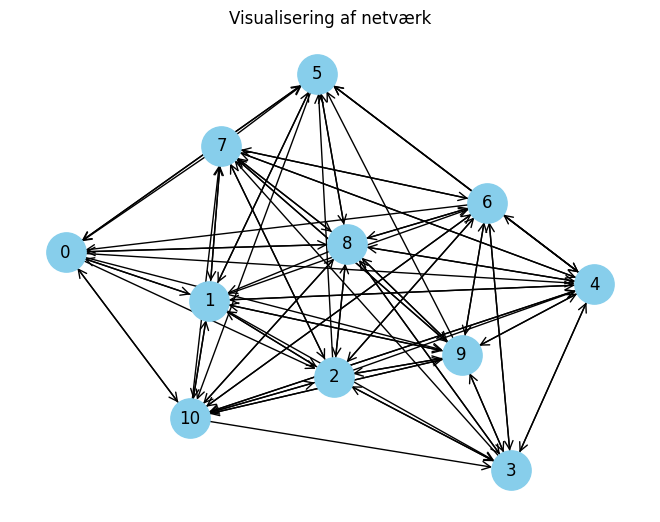

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(web):
    # Input: netværk som dictionary
    # Output: Netværk visualiseret som graf

    G = nx.DiGraph()  # Rettet graf (med pile)

    for node, neighbors in web.items():
        for target in neighbors:
            G.add_edge(node, target)

    pos = nx.spring_layout(G, seed=42)  # Positioner noder pænt
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, arrows=True, arrowstyle='->', arrowsize=15)
    plt.title("Visualisering af netværk")
    plt.show()

visualize_graph(make_web(11,10,5))